# Diabetes Classification using Decision Trees and Random Forest

This notebook implements classification on the diabetes dataset using Decision Trees and Random Forest algorithms.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set basic plot parameters
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
sns.set_theme(style='whitegrid')

## Data Import and Initial Exploration

In [2]:
# Load the dataset
data = pd.read_csv('Datasets/diabetes.csv')

# Display first few rows and basic information
print("First few rows of the dataset:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null

## Exploratory Data Analysis (EDA)

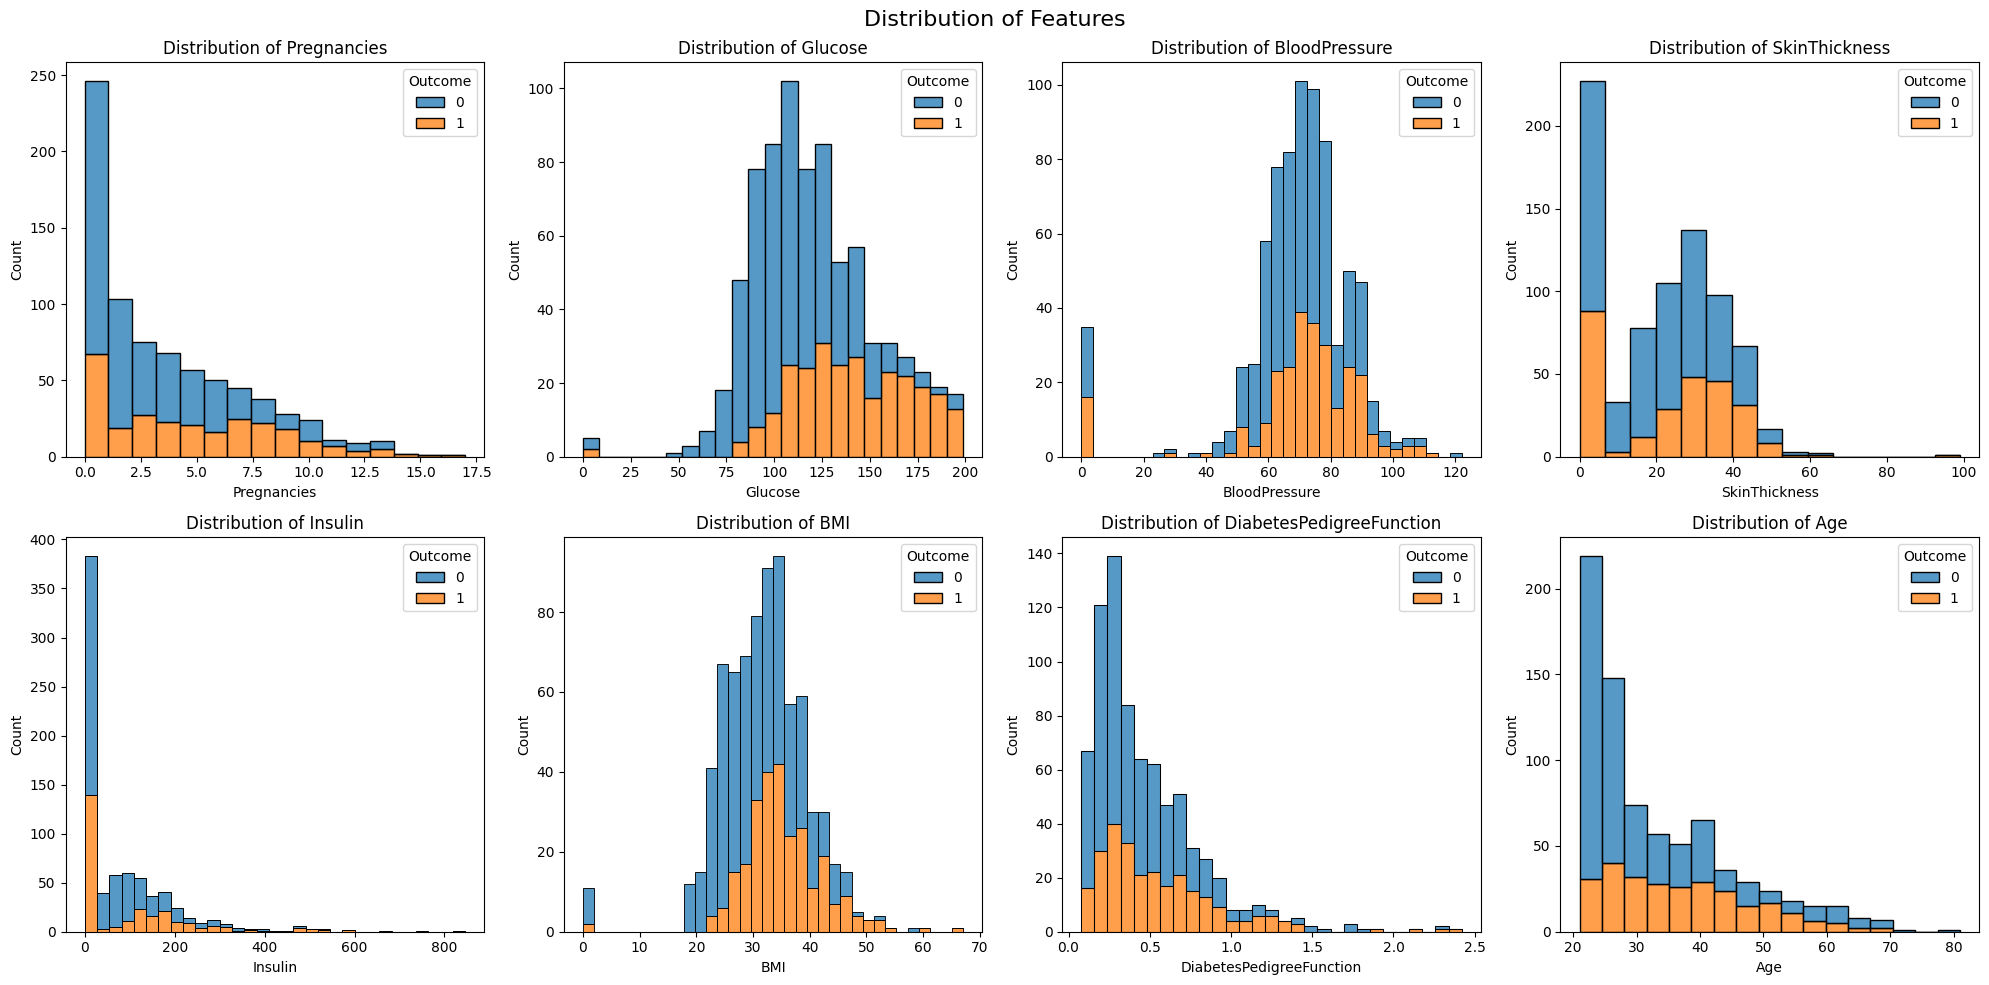

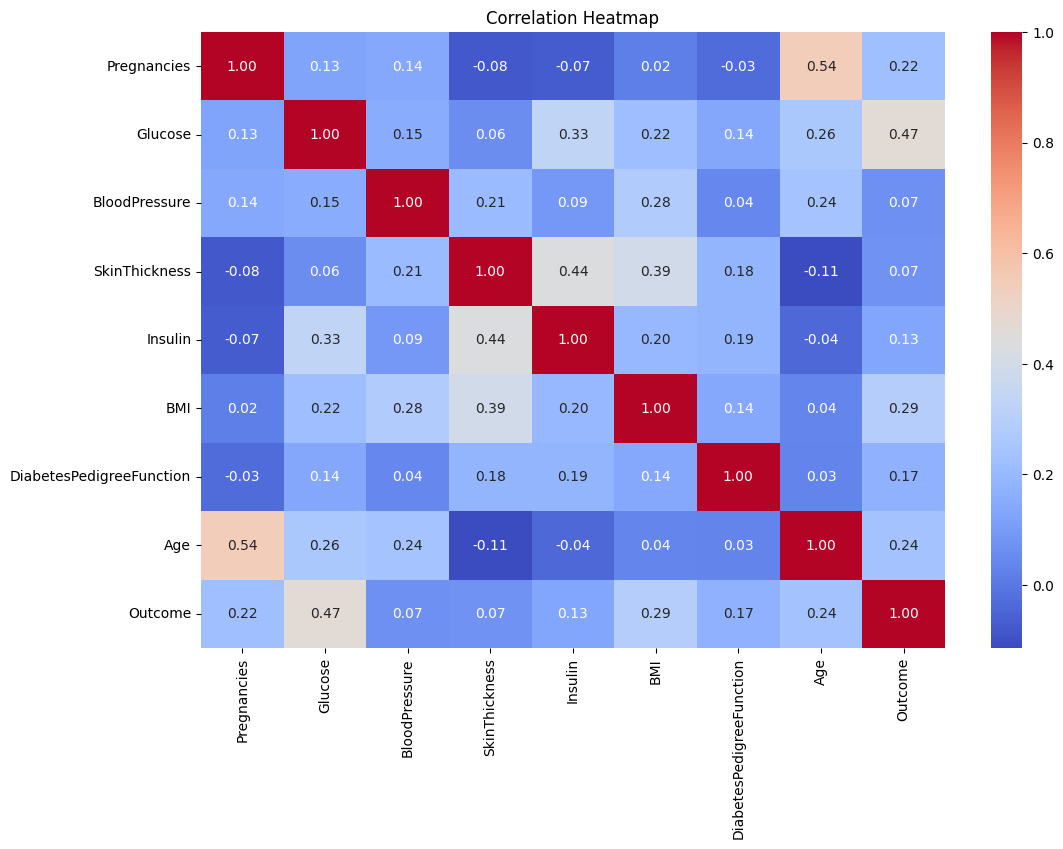

<Figure size 640x480 with 0 Axes>

In [4]:
# Distribution plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Distribution of Features', fontsize=16)

# Plot distribution for each feature except Outcome
for idx, column in enumerate(data.columns[:-1]):
    row = idx // 4
    col = idx % 4
    sns.histplot(data=data, x=column, hue='Outcome', multiple="stack", ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

plt.tight_layout()
plt.show()

## Data Preprocessing

In [4]:
# Split features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (614, 8)
Testing set shape: (154, 8)


## Model Training and Evaluation

### Decision Tree

Decision Tree Accuracy: 74.68%


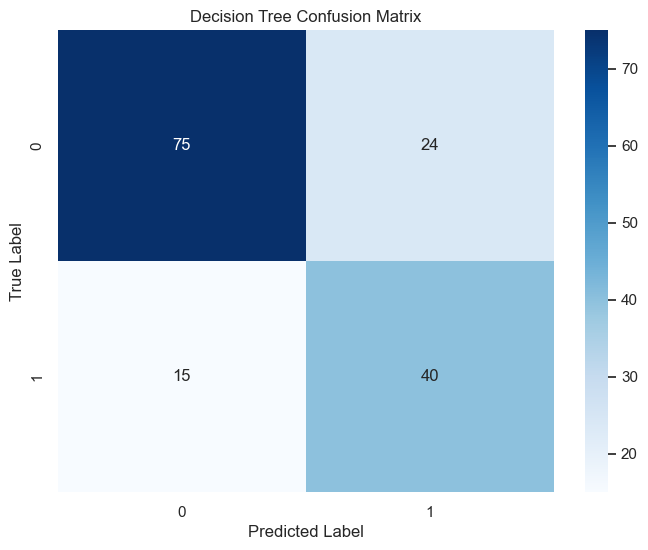


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [5]:
# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy: {:.2f}%".format(dt_accuracy * 100))

# Create and plot confusion matrix
dt_cm = confusion_matrix(y_test, dt_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))

### Random Forest

Random Forest Accuracy: 72.08%


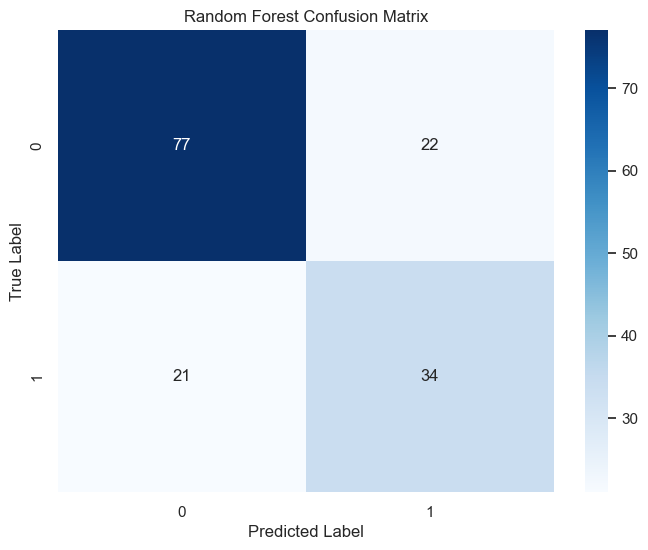


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



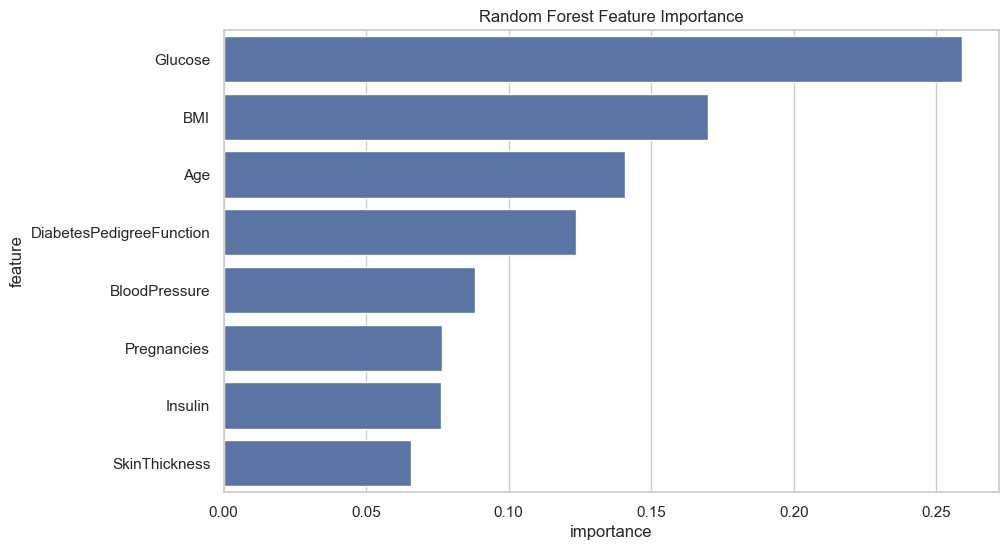

In [6]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy: {:.2f}%".format(rf_accuracy * 100))

# Create and plot confusion matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

## Model Comparison

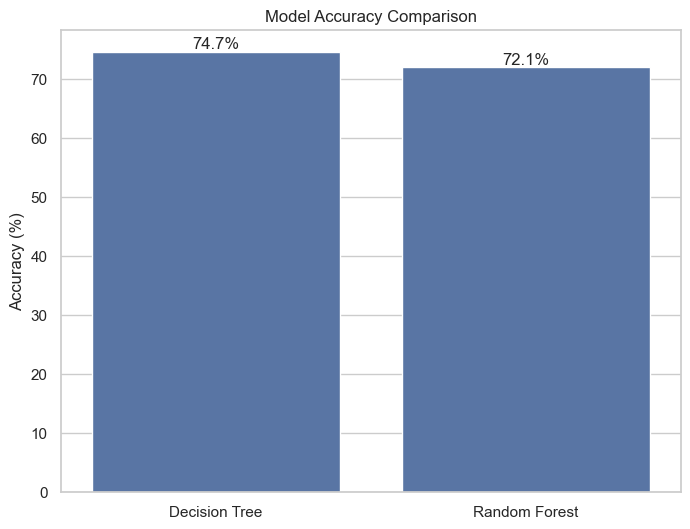

In [7]:
# Compare model accuracies
models = ['Decision Tree', 'Random Forest']
accuracies = [dt_accuracy * 100, rf_accuracy * 100]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center')
plt.show()